In [1]:
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt

## PCA

From Wikipedia:

Principal Component Analysis (PCA) seeks to transform a dataset into a new set of coordinates where the dimension of greatest variance of the data lies along the first component, the dimension of second greatest variance lies along the second component, and so on.

If the data matrix $X$ is of dimension (n,p), the transformation is defined by a set of $p$-dimensional vectors (which can be considered weights) $\mathbf{w}_{(k)}$ that map each row $\mathbf{x}_{(i)}$ of $X$ into a new vector of principle component scores $\mathbf{t}_{(i)}$ where

$\mathbf{t}_{k(i)} = \mathbf{x}_{i}\cdot \mathbf{w}_{l}$ where $i = 1,\cdots,n$ and $k = 1,...,l$ with $l < p$ to reduce dimensionality.  When constraining the weight vector to have unit length, the first principal component can be found via maximizing the variance of $\mathbf{t}_{(1)}$:

$\mathbf  {w}_{{(1)}}={\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left(t_{1}\right)_{{(i)}}^{2}\right\}={\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {x}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}$

Using the definition of a 2-norm, this can be rewritten as:

$ \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X}^{T} \mathbf {Xw} \right\}$

Given that $\mathbf{w}$ is a unit vector, this is equivalent to minimizing:

$ \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X}^{T} \mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}$

Which is the Rayleigh quotient.  As $X^{T}X$ is positive semi definite, the quotient is maximized by the largest eigenvalue of $X^{T}X$, which occurs when $\mathbf{w}$ is the corresponding eigenvector

The $k^{th}$ principal component can be found by subtracting the previous $(k-1)$ components from $X$:

$\hat{X} = X - \sum_{s=1}^{k-1}X\mathbf{w}_{(s)}\mathbf{w}_{(s)}^{T}$

and finding the largest eigenvalue of the resulting matrix

## Power Iteration Method

Evaluation of the covariance: $X^{T}X$ requires $2np^2$ operations, which can be inefficient for large datasets.  To compensate for this, we will utilize the power iteration method to compute eigenvalues/eigenvectors.  This method relies on computing the dot product: $X\mathbf{w}$ which requires $2np$ operations

In [2]:
def power_iteration(X):
    
    n,p = np.shape(X)
    r = np.random.rand(p,1)
    r = r/LA.norm(r,2)
    
    delta = 100
    epsilon = 1e-5
    
    num_iter = 0
    while(delta > epsilon):
        s = np.dot(np.transpose(X), np.dot(X,r))
        
        e_val = np.dot(np.transpose(r),s)
        delta = LA.norm(e_val*r - s, 1)
        r = s/LA.norm(s,2)
        num_iter += 1
        
    return np.sqrt(e_val), r

In [3]:
#Load the data
iris = datasets.load_iris()
y = iris.target
X = iris.data
n,p = np.shape(X)

In [4]:
#PCA

pcs = []
eigenvecs = []

#subtract mean from dataset X
u = np.mean(X,axis=0).reshape(p,1)
B = X - np.dot(np.ones((n,1)), np.transpose(u))

#compute singular values and eigenvectors 
for i in range(0,p):
    #power iteration for largest principal component
    sig_val, ev = power_iteration(B)
    pcs.append(sig_val)
    eigenvecs.append(ev)
    
    #subtract principal component
    B = B - np.dot(B, np.dot(ev, np.transpose(ev)))

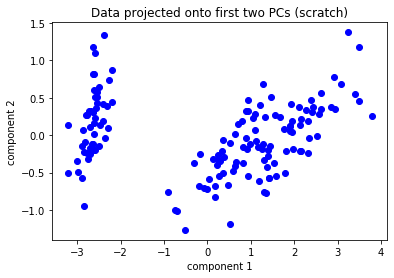

In [9]:
#Project data into lower dimensions
Wp = np.array(eigenvecs).reshape(p,p).transpose()

Wl = Wp[:,:2]

B = X - np.dot(np.ones((n,1)), np.transpose(u))
X_trans = B.dot(Wl)
plt.plot(X_trans[:,0],X_trans[:,1],'bo')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Data projected onto first two PCs (scratch)')
plt.show()

norm of difference of PCA and scratch transforms: 2.044785802964999e-07


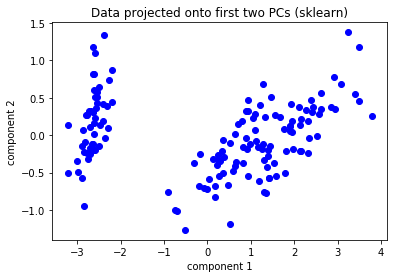

In [10]:
#Compare to sklearn
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_trans_pca = pca.transform(X)

#compare transformed data from both methods
delta = LA.norm(X_trans_pca - X_trans,2)
print("norm of difference of PCA and scratch transforms:", delta)

plt.plot(X_trans_pca[:,0],X_trans_pca[:,1],'bo')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Data projected onto first two PCs (sklearn)')
plt.show()